In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

from scipy.stats import boxcox

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [13]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split

%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [14]:
import sys
sys.path.insert(0, '/Users/valeritereshchenko/Documents/AllWomen_May_2020/Notebooks/Students Turn/M4/M4 - Your turn!')
from My_Functions_28_05 import *

In [15]:
# Loading Data
df_feature_imp = pd.read_csv('df_class.csv', index_col=0)
# Getting dataframe columns names
df_feature_impname=df_feature_imp.columns

In [16]:
df_feature_imp.head()

,proteins_100g,fat_100g,carbohydrates_100g,nova_group,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,additives_n,nutrition-score-fr_100g,nutriscore_grade,product_name
64,9.50,2.2,25.20,4.0,0.358,0.1432,0.60,0.5,160.0,3.0,-4.0,0,BAguette bressan
264,0.00,0.0,83.33,3.0,0.000,0.0000,66.67,0.0,300.0,0.0,3.0,2,Cranberries
318,22.00,12.0,23.00,4.0,2.160,0.8640,0.00,7.0,290.0,3.0,6.0,2,Salade Cesar
354,3.33,10.7,38.70,4.0,0.647,0.2590,24.70,2.0,260.0,3.0,9.0,2,Chaussons tressés aux pommes
361,2.00,0.5,65.00,1.0,0.030,0.0120,51.00,0.1,292.0,0.0,7.0,2,Pommes séchées


In [17]:
df_feature_imp.describe()

,proteins_100g,fat_100g,carbohydrates_100g,nova_group,salt_100g,sodium_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,additives_n,nutrition-score-fr_100g,nutriscore_grade
count,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000,250407.000000
mean,7.773772,13.831079,30.889336,3.405811,1.391929,0.556751,14.605317,5.158229,280.180769,2.129873,9.344515,2.259206
std,9.596638,16.572704,27.901380,0.945696,38.545469,15.415963,19.218594,8.455200,186.524031,2.868753,8.941567,1.334660
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000
25%,1.750000,1.000000,5.900000,3.000000,0.100000,0.040000,1.200000,0.000000,110.000000,0.000000,2.000000,1.000000
50%,5.700000,7.800000,20.600000,4.000000,0.625000,0.250000,5.000000,1.900000,272.000000,1.000000,10.000000,3.000000
75%,10.710000,22.000000,55.810000,4.000000,1.302500,0.521000,22.800000,7.300000,412.000000,3.000000,16.000000,3.000000
max,2000.000000,670.000000,1418.000000,4.000000,16815.000000,6726.000000,545.000000,1780.000000,5466.000000,38.000000,40.000000,4.000000


In [18]:
df_feature_imp.nutriscore_grade.unique()

array([0, 2, 1, 4, 3])

In [19]:
df = df_feature_imp.copy()

We add the feature other_carbs which includes the value of all carbs that are not sugars. Because of that our model can see the correlation between carbohydrates and sugars.

Another feature we want to add is reconstructed_engery. It calculates the energy value of a product based on energy values of the features fat, carbohydrates and proteins. We can compare this feature to the amount of energy that is given in our dataset to see if there possibly are some wrong entries.

In [20]:
df["other_carbs"] = df.carbohydrates_100g - df.sugars_100g

df["reconstructed_energy"] = df.fat_100g * 37 + (df.proteins_100g + df.carbohydrates_100g)* 17

In [21]:
df.columns

Index(['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'nova_group',
       'salt_100g', 'sodium_100g', 'sugars_100g', 'saturated-fat_100g',
       'energy-kcal_100g', 'additives_n', 'nutrition-score-fr_100g',
       'nutriscore_grade', 'product_name', 'other_carbs',
       'reconstructed_energy'],
      dtype='object')

In [22]:
df = df.drop(['nova_group','sodium_100g'], axis = 1)

### Detect and Remove outliers 

In [23]:
# Getting dataframe columns names
df_name=df.columns
df.shape

(250407, 13)

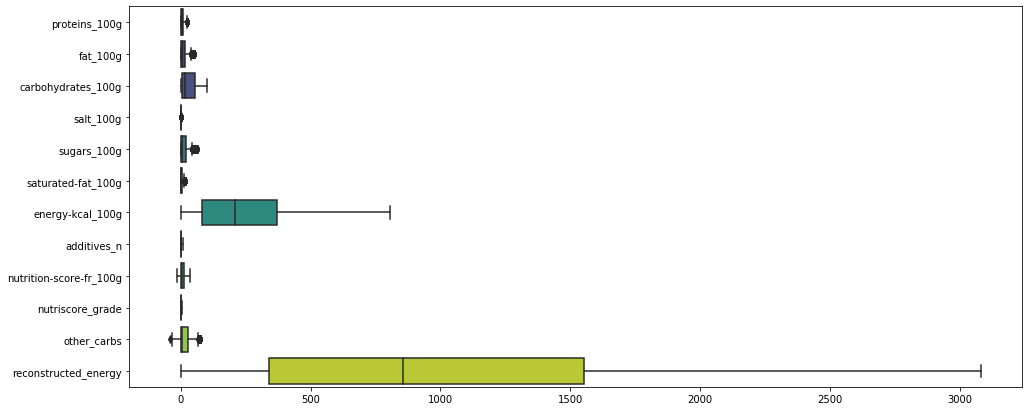

In [24]:
#Remove outliers from ALL of the features

df1 = df.copy()

for column in df1:

    if df1[column].dtype != 'object':
        Q1 = df1[column].quantile(.25)
        Q3 = df1[column].quantile(.75) 
        IQR = Q3 - Q1 #interquartile range 
        lower_limit = Q1 - 1.5 * IQR #at what height is the lower whisker, 1.5*IQR is a defualt size of a whisker 
        upper_limit = Q3 + 1.5 * IQR #at what height is the upper whisker 
 
        df1 = df1[(df1[column] >= (lower_limit)) & (df1[column] <= (upper_limit))] 
        
plt.figure(figsize=(16,7))
sns.boxplot(data=df1, orient='h', palette = 'viridis')

In [25]:
df1.nutriscore_grade.unique()

array([0, 2, 1, 4, 3])

In [26]:
df1.shape

(179930, 13)

In [27]:
# Load libraries
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [28]:
df1.head(3)

,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,additives_n,nutrition-score-fr_100g,nutriscore_grade,product_name,other_carbs,reconstructed_energy
64,9.50,2.2,25.2,0.358,0.6,0.5,160.0,3.0,-4.0,0,BAguette bressan,24.6,671.30
318,22.00,12.0,23.0,2.160,0.0,7.0,290.0,3.0,6.0,2,Salade Cesar,23.0,1209.00
354,3.33,10.7,38.7,0.647,24.7,2.0,260.0,3.0,9.0,2,Chaussons tressés aux pommes,14.0,1110.41


In [29]:
df1.columns

Index(['proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g',
       'sugars_100g', 'saturated-fat_100g', 'energy-kcal_100g', 'additives_n',
       'nutrition-score-fr_100g', 'nutriscore_grade', 'product_name',
       'other_carbs', 'reconstructed_energy'],
      dtype='object')

In [30]:
# Step 1. Split the data into TRAin and TEST set
X =  df1.drop(['nutriscore_grade','product_name',
       'other_carbs', 'reconstructed_energy','additives_n'] , axis=1)
y = df1.nutriscore_grade

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.1,random_state=42)

In [31]:
X.head(3)

,proteins_100g,fat_100g,carbohydrates_100g,salt_100g,sugars_100g,saturated-fat_100g,energy-kcal_100g,nutrition-score-fr_100g
64,9.50,2.2,25.2,0.358,0.6,0.5,160.0,-4.0
318,22.00,12.0,23.0,2.160,0.0,7.0,290.0,6.0
354,3.33,10.7,38.7,0.647,24.7,2.0,260.0,9.0


# Initialise the Scaler 
scaler = StandardScaler() 
  
# Scale data 
data_Sscaled = scaler.fit_transform(X)
data_Sscaled = pd.DataFrame(data_Sscaled, columns= X.columns)

data_Sscaled.head()

In [25]:
models = GetBasedModel()
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('CART',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')),

In [26]:
# performs trainnig and cross validation 
names,results = BasedModels(X_train, y_train,models)

#gives the mean values of cross validation 

LR: Accuracy = 0.679357 (std = 0.008585)
KNN: Accuracy = 0.908205 (std = 0.001840)
CART: Accuracy = 0.996208 (std = 0.000455)
SVM: Accuracy = 0.929232 (std = 0.001445)
RF: Accuracy = 0.997011 (std = 0.000408)


In [27]:
Base_model = ScoreDataFrame(names,results)
Base_model

,Model,Score
0,LR,0.6794
1,KNN,0.9082
2,CART,0.9962
3,SVM,0.9292
4,RF,0.9970


In [48]:
test_data = pd.read_csv('predicted_nutriscore.csv',index_col=0)
test_data.head(3)

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,603.0,51.0,3.9,0.0,11.0,25.0,0.0,7.890008
1,851.0,17.1,0.0,0.0,0.0,1.8,1.5,-4.192324
2,604.0,48.0,8.2,19.0,7.7,22.0,0.0,7.239063


In [32]:
rand_forest = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
print_scoresClassification(rand_forest, X_train, y_train, X_test, y_test, train=True)
print_scoresClassification(rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Results:
CV - Accuracy : 0.9971

CV -Precision: 0.9969

CV -Recall: 0.9968

CV -F1 score: 0.9969

Confusion_matrix:
 [[32107    97     1     0     0]
 [   12 25464     0     0     0]
 [    0     1 39070     0     0]
 [    0     0     1 41818     0]
 [    0     0     0     0 23366]]

Test Results:
CV -Accuracy : 0.9958

CV -Precision: 0.9958

CV -Recall: 0.9953

CV -F1 score: 0.9955

Confusion_matrix:
 [[3606   22    0    0    0]
 [  19 2853    1    0    0]
 [   0    2 4260    0    0]
 [   0    0    2 4614    1]
 [   0    0    2    3 2608]]



### Introduce new test data 

In [7]:
new_test_data = pd.read_csv('new_predicted_score.csv', index_col=0)
new_test_data

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition_score_fr_100g
0,603.0,51.0,3.90,5.40,5.40,25.0,0.000,4.887833
1,203.0,17.1,3.00,10.60,1.90,1.8,1.500,0.115148
2,604.0,48.0,8.20,19.00,7.70,22.0,0.000,5.721593
3,603.0,51.0,3.90,0.00,11.00,25.0,0.000,5.523773
4,551.0,35.0,16.00,45.00,44.00,9.4,0.000,12.508386
5,28.0,0.4,0.10,1.80,1.50,3.0,0.030,-1.386214
6,445.0,22.0,2.70,54.00,27.00,5.7,0.900,10.229739
7,170.0,0.8,0.20,34.00,6.50,5.7,1.500,4.938450
8,403.0,22.6,10.50,40.50,9.20,8.2,0.770,5.157990
9,599.0,65.0,7.40,2.60,2.50,0.7,1.000,-2.626848


In [34]:
new_test_data['nutriscore_grade'] = rand_forest.predict(new_test_data) 

In [35]:
new_test_data

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition_score_fr_100g,nutriscore_grade
0,603.0,51.0,3.90,5.40,5.40,25.0,0.000,4.887833,2
1,203.0,17.1,3.00,10.60,1.90,1.8,1.500,0.115148,1
2,604.0,48.0,8.20,19.00,7.70,22.0,0.000,5.721593,2
3,603.0,51.0,3.90,0.00,11.00,25.0,0.000,5.523773,2
4,551.0,35.0,16.00,45.00,44.00,9.4,0.000,12.508386,3
5,28.0,0.4,0.10,1.80,1.50,3.0,0.030,-1.386214,0
6,445.0,22.0,2.70,54.00,27.00,5.7,0.900,10.229739,2
7,170.0,0.8,0.20,34.00,6.50,5.7,1.500,4.938450,2
8,403.0,22.6,10.50,40.50,9.20,8.2,0.770,5.157990,2
9,599.0,65.0,7.40,2.60,2.50,0.7,1.000,-2.626848,0


### Decode Nutriscore Grade 

In [37]:
new_test_data.nutriscore_grade = new_test_data.nutriscore_grade.map({0:'a', 1:'b',2:'c',3:'d',4:'e'})

In [38]:
new_test_data

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,nutrition_score_fr_100g,nutriscore_grade
0,603.0,51.0,3.90,5.40,5.40,25.0,0.000,4.887833,c
1,203.0,17.1,3.00,10.60,1.90,1.8,1.500,0.115148,b
2,604.0,48.0,8.20,19.00,7.70,22.0,0.000,5.721593,c
3,603.0,51.0,3.90,0.00,11.00,25.0,0.000,5.523773,c
4,551.0,35.0,16.00,45.00,44.00,9.4,0.000,12.508386,d
5,28.0,0.4,0.10,1.80,1.50,3.0,0.030,-1.386214,a
6,445.0,22.0,2.70,54.00,27.00,5.7,0.900,10.229739,c
7,170.0,0.8,0.20,34.00,6.50,5.7,1.500,4.938450,c
8,403.0,22.6,10.50,40.50,9.20,8.2,0.770,5.157990,c
9,599.0,65.0,7.40,2.60,2.50,0.7,1.000,-2.626848,a


In [40]:
new_test_data.to_csv('predicted_nutriscore_grade.csv')